<a href="https://colab.research.google.com/github/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/notebooks/Jun_Hoe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import operator

import sqlalchemy
from sqlalchemy import Table, Column, Integer, String, MetaData
import sqlite3

import pandas as pd
import polars as pl

import sklearn
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [15]:
!curl -L -o plotting_utils.py https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/raw/refs/heads/main/src/egt309_pipeline/plotting_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9594  100  9594    0     0  11092      0 --:--:-- --:--:-- --:--:-- 11092


In [17]:
from plotting_utils import plot_distribution

In [18]:
!gdown --fuzzy https://drive.google.com/file/d/17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j/view?usp=sharing
!mkdir data/
!mv bmarket.db data/

Downloading...
From: https://drive.google.com/uc?id=17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j
To: /content/bmarket.db
100% 3.15M/3.15M [00:00<00:00, 144MB/s]


In [19]:
con = sqlite3.connect("data/bmarket.db")
cursor = con.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
for row in cursor.fetchall():
    print(row)

('bank_marketing',)


In [20]:
query = "SELECT * FROM bank_marketing;"
df = pd.read_sql_query(query, con)
df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


![IMAGE of attributes of bank marketing table](https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/EDA/images/bmarketing_attributes.png?raw=1)

## 1. Initiate Data Understanding and Insights

In [ ]:
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58 years,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37 years,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35 years,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40 years,management,married,university.degree,no,None,no,telephone,2,999,no


In [ ]:
df.info()
print("\nTable Size:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB

Table Size: (41188, 12)


In [ ]:
df.isna().sum()

,0
Client ID,0
Age,0
Occupation,0
Marital Status,0
Education Level,0
Credit Default,0
Housing Loan,24789
Personal Loan,4146
Contact Method,0
Campaign Calls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

> **OBSERVATION:**
___

- Reading the bank marketing table, the dataframe has **41188 rows** and **12 columns**.

- While observing the .info(), we can see that **`Client ID`**, **`Campaign Call`** and **`Previous Contact Days`** is assigned as *Integer* type. While the remaining columns are *Object* type.

- Furthermore, the .info() also shows that all of the columns has no empty values besides **Housing Loan (24789 missing data)** and **Personal Loan (4146 missing data)**.

- There is **no duplicated data** found.

(Temp) - In addition, the table displayed shows signs of **missing data** in certain columns (e.g. `Occupation`, `Education Level`, `Credit Default`). These columns **were expected to have no empty values** based on previous statement. These missing values are refered to as *unknown*.

- The `Subscription Status` column shows values of *yes* or *no* in string type instead of *True* or *False* in boolean type.

- Lastly, the values in `Age` column seems to **contains the text *years*** after all the numeric values, which is unnecessary. While `Education Level` column has a **two part format with a '.' between two key words** (e.g. high.school, univeristy.degree). The `Occupation` column has an **admin role that ended with '.'**.



> **THOUGHT PROCESS:**
___

(Temp) 1. I need to replace all the *unknown* with *numpy NaN (np.nan)* to ensure all the missing data is captured.

2. A deeper observation into `Education Level` and `Occupation` columns is required to get a better understanding before cleaning.

3. I can remove *years* from the values in `Age` column and change the data type to *Integer*.

4. I can convert `Subscription Status` column into boolean type, with values of *True* or *False*, since the attribute says the column is defines as "Whether the client subscribed or not".

#### Temp (1a. Replace *unknown* and *None* with np.nan)

In [ ]:
replace_with_nan = ["unknown", None]
df.replace(replace_with_nan, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             40858 non-null  object
 3   Marital Status         41108 non-null  object
 4   Education Level        39457 non-null  object
 5   Credit Default         32591 non-null  object
 6   Housing Loan           16006 non-null  object
 7   Personal Loan          36165 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [ ]:
df.isna().sum()

,0
Client ID,0
Age,0
Occupation,330
Marital Status,80
Education Level,1731
Credit Default,8597
Housing Loan,25182
Personal Loan,5023
Contact Method,0
Campaign Calls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

> **Observation:**
___



#### 1b. Understanding Column data by Columns and insights

##### `Client ID` Column

In [21]:
print("Number of unique values:", df["Client ID"].nunique())

Number of unique values: 41188


> **OBSERVATION:**
___

- All rows/entries are uniquely identified by the Client ID.
- No repeated Client ID throughout data.

> **THINKING PROCESS:**
___

1. `Client ID` column can be remove as it serves no predicting values and contribute to high dimensionality issue in input data.

In [22]:
df.drop("Client ID", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


##### `Age` Column

In [23]:
display(df["Age"].describe())
print("List all unique values:\n", df["Age"].sort_values().unique())

,Age
count,41188
unique,77
top,150 years
freq,4197


List all unique values:
 ['150 years' '17 years' '18 years' '19 years' '20 years' '21 years'
 '22 years' '23 years' '24 years' '25 years' '26 years' '27 years'
 '28 years' '29 years' '30 years' '31 years' '32 years' '33 years'
 '34 years' '35 years' '36 years' '37 years' '38 years' '39 years'
 '40 years' '41 years' '42 years' '43 years' '44 years' '45 years'
 '46 years' '47 years' '48 years' '49 years' '50 years' '51 years'
 '52 years' '53 years' '54 years' '55 years' '56 years' '57 years'
 '58 years' '59 years' '60 years' '61 years' '62 years' '63 years'
 '64 years' '65 years' '66 years' '67 years' '68 years' '69 years'
 '70 years' '71 years' '72 years' '73 years' '74 years' '75 years'
 '76 years' '77 years' '78 years' '79 years' '80 years' '81 years'
 '82 years' '83 years' '84 years' '85 years' '86 years' '88 years'
 '89 years' '91 years' '92 years' '95 years' '98 years']


<Axes: xlabel='Age', ylabel='Frequency'>

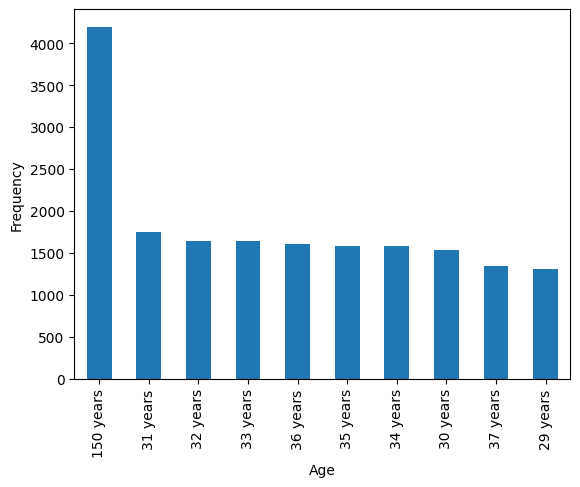

In [24]:
df["Age"].value_counts().head(10).plot(kind='bar', ylabel="Frequency")

In [25]:
print("Percentage of 150 years old: {:.5f}%".format((df[df["Age"] == "150 years" ].shape[0]/df.shape[0]*100)))

Percentage of 150 years old: 10.18986%


> **OBSERVATION:**
___

- "150 years" !!! Most likely a recorded error.
- The value "150 years" has the highest frequency by a large margin compared to other ages.
- The values in `Age` column do **contains the text *years*** after all the numeric values, which is a data type issue.

> **THINKING PROCESS**
___

- I can remove *years* from the values in `Age` column.
- Convert the data type to *Integer*.
- Plot histogram to get better insights and possibly impute the "150 years"

In [26]:
df["Age"] = df["Age"].map(lambda x: x.split()[0])
df["Age"] = df["Age"].astype(int)
df["Age"]

,Age
0,57
1,55
2,33
3,36
4,27
...,...
41183,58
41184,37
41185,35
41186,40


<Axes: >

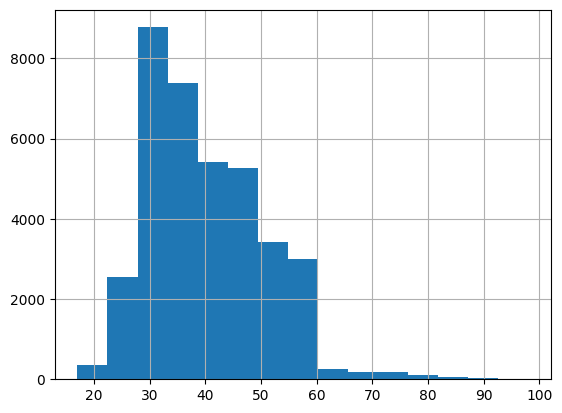

In [27]:
fig = df["Age"][df["Age"] != 150].hist(bins=15)
fig

In [28]:
df_not_150 = df[df["Age"] != 150]["Age"]
df_mean_rp = df["Age"].apply(lambda x: df_not_150.agg("mean") if x == 150 else x)
df_mean_rp.head()

,Age
0,57.0
1,55.0
2,33.0
3,36.0
4,27.0


<Axes: >

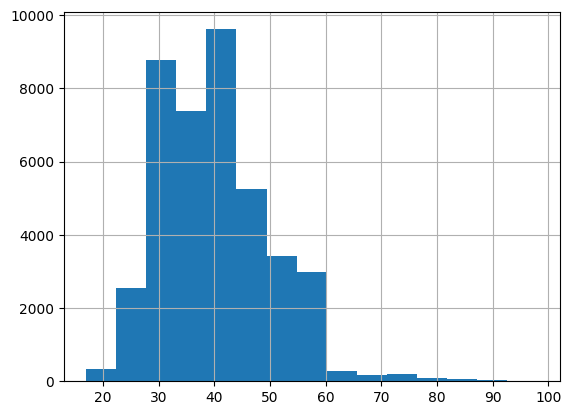

In [29]:
fig = df_mean_rp.hist(bins=15)
fig

In [30]:
df_not_150 = df[df["Age"] != 150]["Age"]
df_median_rp = df["Age"].apply(lambda x: df_not_150.agg("median") if x == 150 else x)
df_median_rp.head()

,Age
0,57.0
1,55.0
2,33.0
3,36.0
4,27.0


<Axes: >

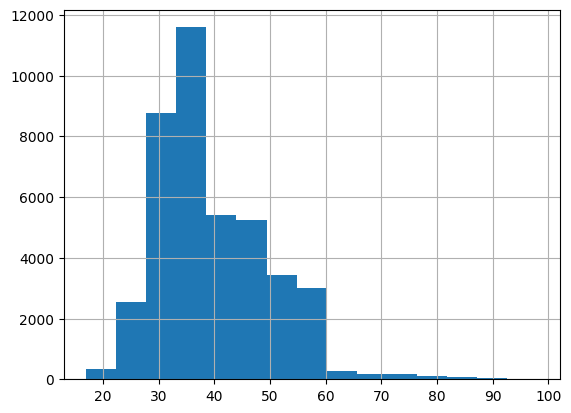

In [31]:
fig = df_median_rp.hist(bins=15)
fig

##### `Occupation` Column

In [32]:
display(df["Occupation"].describe())
print("List all unique values:\n", df["Occupation"].sort_values().unique())

,Occupation
count,41188
unique,12
top,admin.
freq,10422


List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


<Axes: xlabel='Occupation', ylabel='Frequency'>

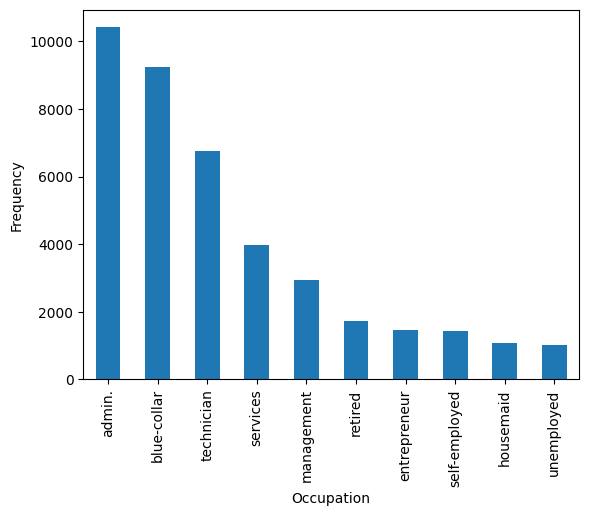

In [33]:
df["Occupation"].value_counts().head(10).plot(kind='bar', ylabel="Frequency")

In [34]:
print("Percentage of unknown: {:.2f}%".format((df[df["Occupation"] == 'unknown'].shape[0]/df.shape[0]*100)))

Percentage of unknown: 0.80%


> **Observation:**
___

- It is a Norminal Category
- Possible to one-hot or integer encode to feed into machine learning
- unknown only made out of 0.8% which is less than 1%



In [37]:
df.drop(df[df["Occupation"]=="unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Occupation"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
New Shape:  (40858, 11)


##### `Marital Status` Column

In [38]:
display(df["Marital Status"].describe())
print("List all unique values:\n", df["Marital Status"].sort_values().unique())

,Marital Status
count,40858
unique,4
top,married
freq,24694


List all unique values:
 ['divorced' 'married' 'single' 'unknown']


<Axes: xlabel='Marital Status', ylabel='Frequency'>

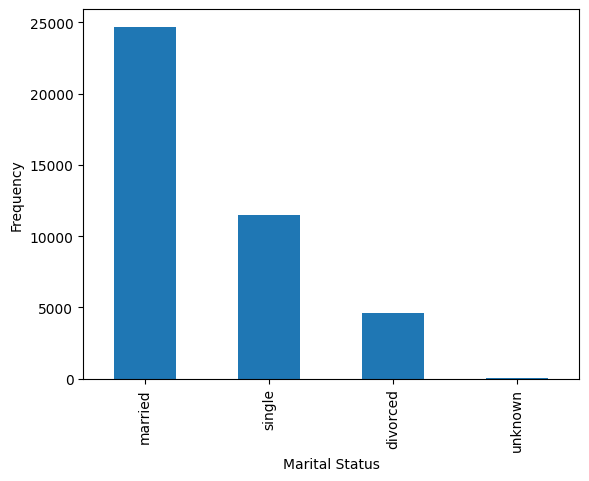

In [39]:
df["Marital Status"].value_counts().plot(kind='bar', ylabel="Frequency")

In [40]:
print("Percentage of unknown: {:.2f}%".format((df[df["Marital Status"] == 'unknown'].shape[0]/df.shape[0]*100)))

Percentage of unknown: 0.17%


> **Observation:**
___

- Mostly Married, second Singles
- unknown

In [42]:
df.drop(df[df["Marital Status"]=="unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Marital Status"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['divorced' 'married' 'single']
New Shape:  (40787, 11)


##### `Education Level` Column

In [43]:
display(df["Education Level"].describe())
print("List all unique values:\n", df["Education Level"].sort_values().unique())

,Education Level
count,40787
unique,8
top,university.degree
freq,12096


List all unique values:
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


<Axes: xlabel='Education Level', ylabel='Frequency'>

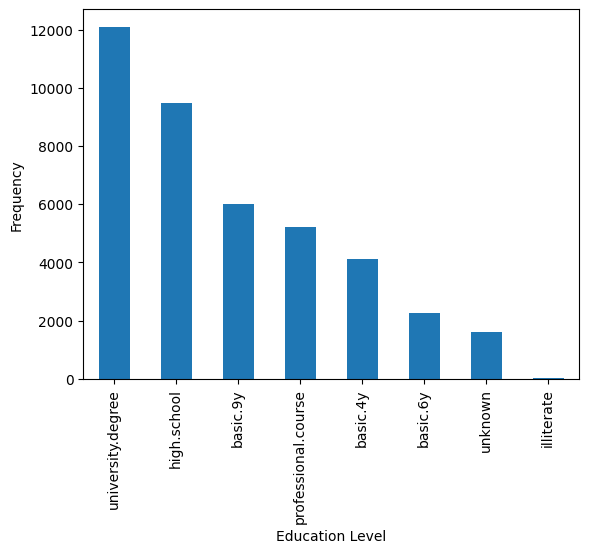

In [44]:
df["Education Level"].value_counts().plot(kind='bar', ylabel="Frequency")

In [45]:
print("Percentage of unknown: {:.2f}%".format((df[df["Education Level"] == 'unknown'].shape[0]/df.shape[0]*100)))

Percentage of unknown: 3.91%


> **Observation:**
___

-

##### `Credit Default` Column

In [46]:
display(df["Credit Default"].describe())
print("List all unique values:\n", df["Credit Default"].sort_values().unique())

,Credit Default
count,40787
unique,3
top,no
freq,32348


List all unique values:
 ['no' 'unknown' 'yes']


<Axes: xlabel='Credit Default', ylabel='Frequency'>

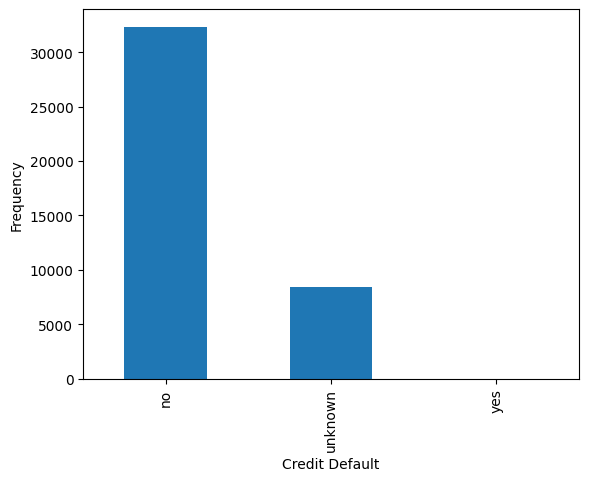

In [47]:
df["Credit Default"].value_counts().plot(kind='bar', ylabel="Frequency")

In [48]:
print("Percentage of yes: {:.5f}%".format((df[df["Credit Default"] == 'yes'].shape[0]/df.shape[0]*100)))
print("Percentage of unknown: {:.5f}%".format((df[df["Credit Default"] == 'unknown'].shape[0]/df.shape[0]*100)))
print("Percentage of no: {:.5f}%".format((df[df["Credit Default"] == 'no'].shape[0]/df.shape[0]*100)))

Percentage of yes: 0.00736%
Percentage of unknown: 20.68306%
Percentage of no: 79.30958%


> **Observation:**
___

- The amount of "yes" is way too little and most are "no" (80%)
- 20% is unknown which would not display

> **THOUGHT PROCESS:**
___

- Can drop `Credit Default` column since most users disagree with credit default

In [49]:
df.drop("Credit Default", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57,technician,married,high.school,no,yes,Cell,1,999,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,999,no
3,36,admin.,married,high.school,no,no,Telephone,4,999,no
4,27,housemaid,married,high.school,None,no,Cell,2,999,no
5,58,retired,married,professional.course,None,yes,Cell,1,999,no


##### `Housing Loan` Column

In [50]:
display(df["Housing Loan"].describe())
print("List all unique values:\n", df["Housing Loan"].sort_values().unique())

,Housing Loan
count,16243
unique,3
top,yes
freq,8522


List all unique values:
 ['no' 'unknown' 'yes' None]


<Axes: xlabel='Housing Loan', ylabel='Frequency'>

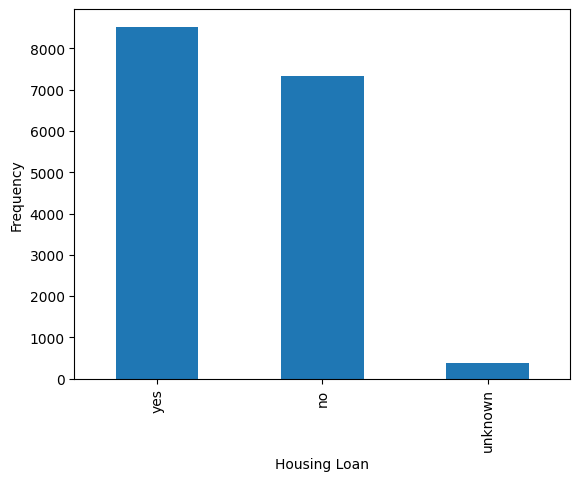

In [51]:
df["Housing Loan"].value_counts().plot(kind='bar', ylabel="Frequency")

In [52]:
print("Percentage of unknown: {:.5f}%".format((df[df["Housing Loan"] == 'unknown'].shape[0]/df.shape[0]*100)))
print("Percentage of none: {:.5f}%".format((df[df["Housing Loan"].isna()].shape[0]/df.shape[0]*100)))

Percentage of unknown: 0.95619%
Percentage of none: 60.17604%


##### `Personal Loan` Column

In [53]:
display(df["Personal Loan"].describe())
print("List all unique values:\n", df["Personal Loan"].sort_values().unique())

,Personal Loan
count,36679
unique,3
top,no
freq,30229


List all unique values:
 ['no' 'unknown' 'yes' None]


<Axes: xlabel='Personal Loan', ylabel='Frequency'>

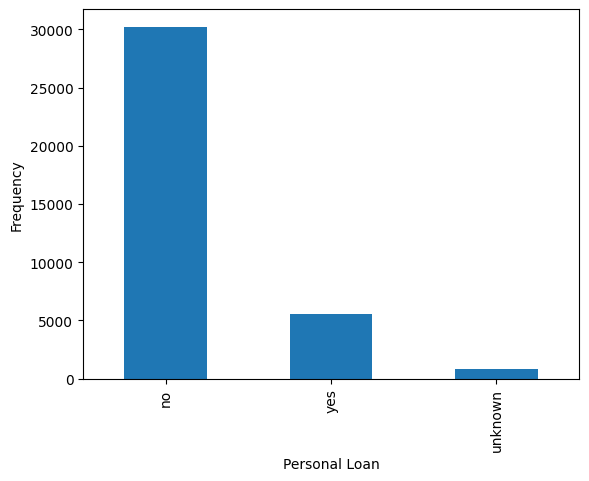

In [54]:
df["Personal Loan"].value_counts().plot(kind='bar', ylabel="Frequency")

In [55]:
print("Percentage of unknown: {:.5f}%".format((df[df["Personal Loan"] == 'unknown'].shape[0]/df.shape[0]*100)))

Percentage of unknown: 2.13794%


##### `Contact Method` Column

In [56]:
display(df["Contact Method"].describe())
print("List all unique values:\n", df["Contact Method"].sort_values().unique())

,Contact Method
count,40787
unique,4
top,Cell
freq,13001


List all unique values:
 ['Cell' 'Telephone' 'cellular' 'telephone']


> **Observation:**
___

- Cell and cellular
- Telephone and telephone

> **THOUGHT PROCESS:**
___

- Replace all Cell with cellular
- Replace all Telephone with telephone

In [57]:
df["Contact Method"].replace(["Cell", "Telephone"], ["cellular", "telephone"], inplace=True)

<Axes: xlabel='Contact Method', ylabel='Frequency'>

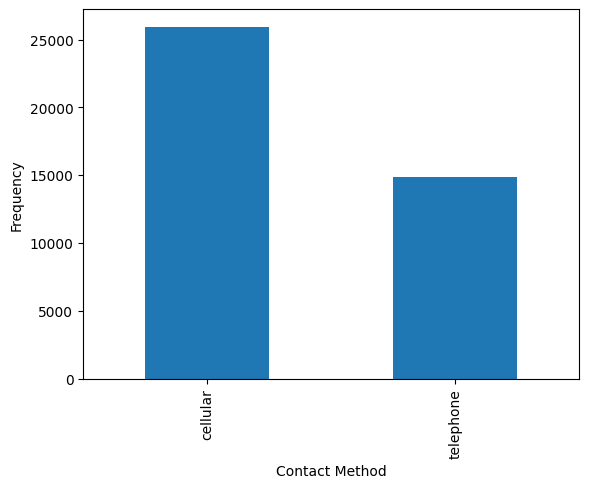

In [58]:
df["Contact Method"].value_counts().plot(kind='bar', ylabel="Frequency")

##### `Campaign Calls` Column

In [59]:
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,40787.000000
mean,2.049722
std,3.169546
min,-41.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [-41 -35 -32 -29 -28 -25 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  37  39  40  42  43  56]


<Axes: xlabel='Campaign Calls', ylabel='Frequency'>

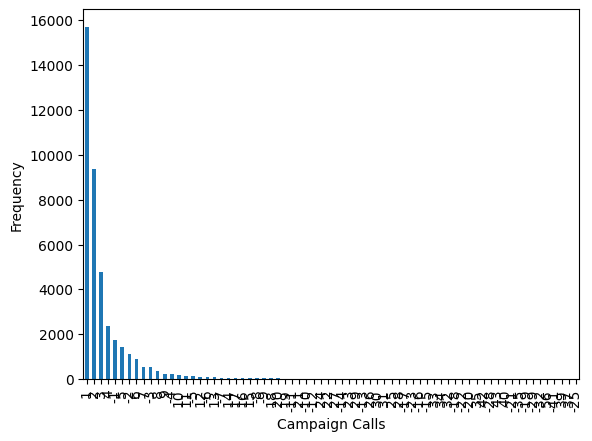

In [60]:
df["Campaign Calls"].value_counts().plot(kind='bar', ylabel="Frequency")

In [61]:
plot_distribution(df, col_name="Campaign Calls")

> **Observation:**
___

-

In [62]:
df["Campaign Calls"] = df["Campaign Calls"].apply(lambda x : abs(x))
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,40787.000000
mean,2.566112
std,2.768103
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]


In [63]:
plot_distribution(df, col_name="Campaign Calls")

##### `Previous Contact Days` Column

In [64]:
display(df[df["Previous Contact Days"]!=999]["Previous Contact Days"].describe())
print("List all unique values:\n", df["Previous Contact Days"].sort_values().unique())

,Previous Contact Days
count,1490.000000
mean,6.026174
std,3.829297
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,27.000000


List all unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]


<Axes: xlabel='Previous Contact Days', ylabel='Frequency'>

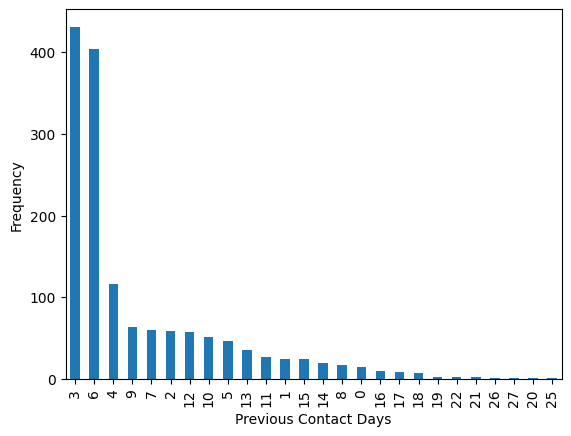

In [65]:
df[df["Previous Contact Days"]!=999]["Previous Contact Days"].value_counts().plot(kind='bar', ylabel="Frequency")

<Axes: xlabel='count'>

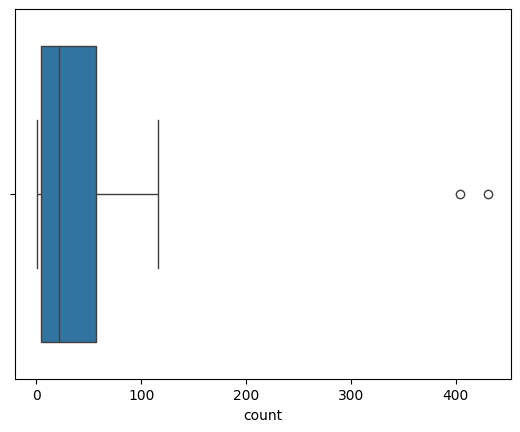

In [66]:
sns.boxplot(x=df[df["Previous Contact Days"]!=999]["Previous Contact Days"].value_counts())

In [67]:
print("Percentage of 999: {:.5f}%".format((df[df["Previous Contact Days"] == 999].shape[0]/df.shape[0]*100)))

Percentage of 999: 96.34688%


In [68]:
df["Previously Contacted"] = df["Previous Contact Days"]!=999
df.replace({"Previous Contact Days":999}, -1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status,Previously Contacted
0,57,technician,married,high.school,no,yes,cellular,1,-1,no,False
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,no,False
3,36,admin.,married,high.school,no,no,telephone,4,-1,no,False
4,27,housemaid,married,high.school,None,no,cellular,2,-1,no,False
5,58,retired,married,professional.course,None,yes,cellular,1,-1,no,False


In [69]:
columns = df.columns.tolist()
columns.remove("Subscription Status")
columns.append('Subscription Status')
df = df.reindex(columns=columns)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,no,yes,cellular,1,-1,False,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,False,no
3,36,admin.,married,high.school,no,no,telephone,4,-1,False,no
4,27,housemaid,married,high.school,None,no,cellular,2,-1,False,no
5,58,retired,married,professional.course,None,yes,cellular,1,-1,False,no


`Previously Contacted`: False means no contact | True means there is contact

`Previous Contact Days`: 999 converted to -1

##### `Subscription Status` Column

In [70]:
display(df["Subscription Status"].describe())
print("List all unique values:\n", df["Subscription Status"].sort_values().unique())

,Subscription Status
count,40787
unique,2
top,no
freq,36193


List all unique values:
 ['no' 'yes']


<Axes: xlabel='Subscription Status', ylabel='Frequency'>

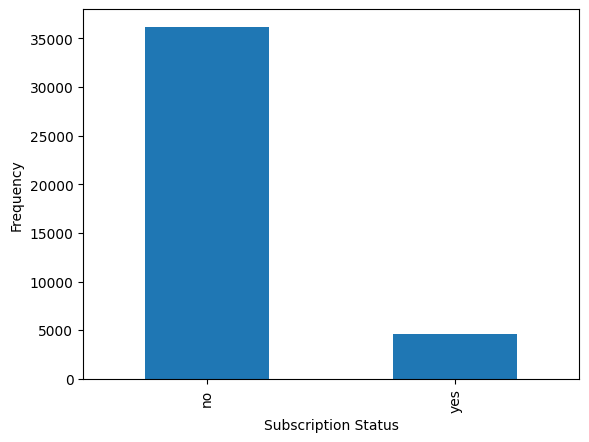

In [71]:
df["Subscription Status"].value_counts().plot(kind='bar', ylabel="Frequency")

- Use Stratify when splitting the dataset for model training to ensure balance yes and no

- Convert to Boolean data type

In [72]:
df["Subscription Status"].replace({'yes': 1, 'no': 0}, inplace=True)
df["Subscription Status"] = df["Subscription Status"].astype(bool)
df.dtypes

,0
Age,int64
Occupation,object
Marital Status,object
Education Level,object
Housing Loan,object
Personal Loan,object
Contact Method,object
Campaign Calls,int64
Previous Contact Days,int64
Previously Contacted,bool


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Housing Loan           16243 non-null  object
 5   Personal Loan          36679 non-null  object
 6   Contact Method         40787 non-null  object
 7   Campaign Calls         40787 non-null  int64 
 8   Previous Contact Days  40787 non-null  int64 
 9   Previously Contacted   40787 non-null  bool  
 10  Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 3.2+ MB


## Data Preparation

#### Data Cleaning

#### Check relationships

In [74]:
encoder = LabelEncoder()

In [75]:
def encoder_fn(df):
  df_copy = df.copy()
  df_encode = pd.DataFrame()
  for col in df_copy.columns:
    if isinstance(df_copy[col], object):
      df_encode[col] = encoder.fit_transform(df_copy[col])
    else:
      df_encode[col] = df_copy[col]
  return df_encode

##### Mutual Information (MI) of Housing Loan

In [76]:
df_encode = encoder_fn(df)
df_encode.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,40,9,1,3,0,2,0,0,0,0,0
1,16,1,1,2,0,0,0,0,0,0,0
2,19,0,1,3,0,0,1,3,0,0,0
3,10,3,1,3,3,0,0,1,0,0,0
4,41,5,1,5,3,2,0,0,0,0,0


In [77]:
target = 'Housing Loan'
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  int64
 9   Subscription Status    40787 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Housing Loan
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [78]:
mi_scores = mutual_info_classif(X_df, y)

In [79]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Housing Loan
Personal Loan,0.040830
Previous Contact Days,0.002805
Marital Status,0.002643
Occupation,0.002498
Subscription Status,0.002345
Education Level,0.001504
Contact Method,0.000623
Age,0.000000
Campaign Calls,0.000000
Previously Contacted,0.000000


##### Mutual Information (MI) of Personal Loan

In [95]:
df_encode = encoder_fn(df)
target = 'Personal Loan'
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Contact Method         40787 non-null  int64
 5   Campaign Calls         40787 non-null  int64
 6   Previous Contact Days  40787 non-null  int64
 7   Previously Contacted   40787 non-null  int64
 8   Subscription Status    40787 non-null  int64
dtypes: int64(9)
memory usage: 2.8 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Personal Loan
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [96]:
mi_scores = mutual_info_classif(X_df, y)

In [97]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Personal Loan
Campaign Calls,0.003857
Marital Status,0.003792
Previous Contact Days,0.002528
Education Level,0.002414
Age,0.001127
Contact Method,0.000997
Occupation,0.000719
Previously Contacted,0.000000
Subscription Status,0.000000


##### Mutual Information (MI) of Age

In [83]:
df_encode = encoder_fn(df)
target = 'Age'
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Occupation             40787 non-null  int64
 1   Marital Status         40787 non-null  int64
 2   Education Level        40787 non-null  int64
 3   Housing Loan           40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  int64
 9   Subscription Status    40787 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Age
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [84]:
mi_scores = mutual_info_classif(X_df, y)

In [85]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Age
Occupation,0.143471
Marital Status,0.105555
Education Level,0.042121
Subscription Status,0.020188
Contact Method,0.009325
Housing Loan,0.007361
Previously Contacted,0.006832
Previous Contact Days,0.005915
Personal Loan,0.000537
Campaign Calls,0.000000


#### Decided Missing Data Solution for Age, Housing Loan & Personal Loan

In [91]:
def random_distribution(df):
  target = ["Personal Loan"]
  if not isinstance(df, pd.DataFrame):
    raise "df is not a DataFrame"
  else:
    pass

In [ ]:
df.drop("Housing Loan", axis=1, inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Personal Loan          36679 non-null  object
 5   Contact Method         40787 non-null  object
 6   Campaign Calls         40787 non-null  int64 
 7   Previous Contact Days  40787 non-null  int64 
 8   Previously Contacted   40787 non-null  bool  
 9   Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 2.9+ MB


In [94]:
df.head()

,Age,Occupation,Marital Status,Education Level,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,yes,cellular,1,-1,False,False
2,33,blue-collar,married,basic.9y,no,cellular,1,-1,False,False
3,36,admin.,married,high.school,no,telephone,4,-1,False,False
4,27,housemaid,married,high.school,no,cellular,2,-1,False,False
5,58,retired,married,professional.course,yes,cellular,1,-1,False,False
